In [1]:
import pandas as pd
import seaborn as sns

# Handling Outliers

#### There are two methods to identify outliers

1. IQR  ( Inter Quartile Range )

2. Z Score

We can divide any data into 4 quartiles(1/4) 

Lets assume the data is

10,20,30,40,60,70,80,90,100

 Median = 60

1st part -> 10,20,30,40

Median = 25


2nd Part->70,80,90,100

Median = 85

min value = 10

Q1 (First Part Median) = 25

Q2 (Entire Median of the dataset) = 60 

Q3 (Second Part Median) = 85

Maximum Value = 100

From min to Q1 we have 25% of the data

From Q1 - Q2 --> 25% of data

Q2 - Q3 ---> 25% of data

Q3 - Max ---> 25% of data

In this way we are dividing the entire data into 4 quartiles

Cumilative Percentile

min - Q1  :  25% 

min  - Q2  : 50% 

Q2 - Q3   : 75% 

Q3 - Max  : 100% 

In [2]:
data = pd.read_csv("Social_Network_Ads_1.csv")

In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.030000e+02,403.000000,4.010000e+02,403.000000
mean,1.569141e+07,37.692308,8.236658e+04,0.359801
std,7.153372e+04,10.475730,2.486716e+05,0.480539
min,1.556669e+07,18.000000,1.500000e+04,0.000000
25%,1.562631e+07,30.000000,4.300000e+04,0.000000
50%,1.569429e+07,37.000000,7.000000e+04,0.000000
75%,1.575020e+07,46.000000,8.800000e+04,1.000000
max,1.581524e+07,60.000000,5.000000e+06,1.000000


By looking at age

1. Minimum age of the customers is 18

2. Only 25% of the customers are below 30

3. Almost 50% of the customers are below 37

4. Almost 75% of the customers are below 46( Most of the customers are below 46)



## Interquartile Range -IQR ( Q3-Q1)
##### Measure of spread

IQR helps us to understand what is the deviation of the data from the majority of the data

In [4]:
data["Age"].describe()

count    403.000000
mean      37.692308
std       10.475730
min       18.000000
25%       30.000000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [5]:
data["Age"].describe()["75%"]

46.0

In [6]:
data["Age"].describe()["25%"] 

30.0

In [7]:
IQR = data["Age"].describe()["75%"] - data["Age"].describe()["25%"] 

In [8]:
IQR

16.0

IQR --> Deviation(Difference)from the minimum quartile(Q1) to maximum quartile(Q3) of majority of the portion of data

### Box Plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

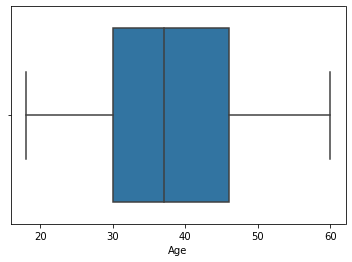

In [9]:
sns.boxplot(data["Age"])

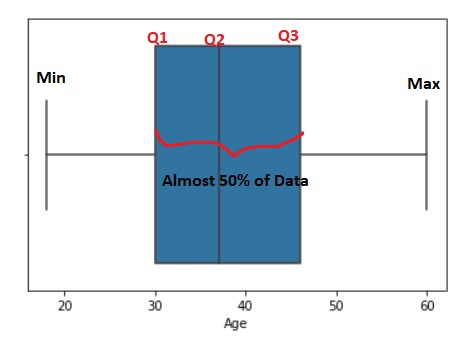

From Q1 - Q3 -> Almost 50% of data is present in the blue box
if we avoid extreme points. Whatever data in the box is the majority of data. From the above box plot we can see that age doesn't have any outliers

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

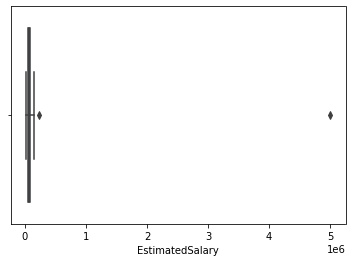

In [10]:
sns.boxplot(data["EstimatedSalary"])

Here we can see  two outliers (In Box plot outliers are represented as dots)

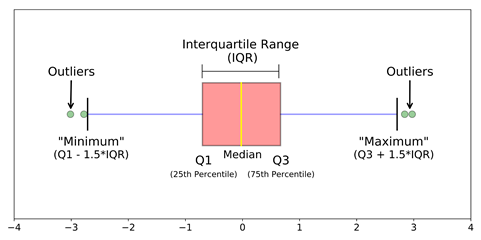

### General Formula of Outliers

Any data point which is 1.5 times far away from the IQR range then it is an outliers

### Lower Outliers(Present at left side of the data) 

Lower Boundary = $Q_1-(1.5* IQR)$

### Upper Outliers(Present at right side of the data) 

Upper Boundary = $Q_3+ (1.5* IQR)$

In [11]:
data["EstimatedSalary"].describe()

count    4.010000e+02
mean     8.236658e+04
std      2.486716e+05
min      1.500000e+04
25%      4.300000e+04
50%      7.000000e+04
75%      8.800000e+04
max      5.000000e+06
Name: EstimatedSalary, dtype: float64

In [12]:
Q1 = data["EstimatedSalary"].describe()["25%"]
Q3 = data["EstimatedSalary"].describe()["75%"]

In [13]:
IQR_Sal = Q3-Q1

In [14]:
IQR_Sal

45000.0

In [15]:
lower_boundary = Q1 - (1.5*IQR_Sal)
lower_boundary 

-24500.0

Any data points is less than -24500.0 are lower outliers

In [16]:
upper_boundary = Q3 + (1.5*IQR_Sal)

In [17]:
upper_boundary

155500.0

Any data points is greater than 155500.0 are upper outliers

In [18]:
data[data["EstimatedSalary"] < -24500.0] # Checking for lower outliers

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased


In [19]:
data[data["EstimatedSalary"] > 155500.0] #Checking for upper outlier

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
161,15734234,8/22/2012,France,Male,36,5000000.0,1
281,15613334,2/15/2013,Italy,Female,54,233000.0,1


# How to handle outliers

### 1. Removing the outliers 


### Percentage Of Outliers

# $\frac{No Of UpperOutliers + No Of LowerOutliers}{total No Data } * 100 $

In [25]:
total = data["EstimatedSalary"].shape[0] # No of total data

In [28]:
No_of_upperOutliers = data[data["EstimatedSalary"] > 155500.0].shape[0] # No of upper outlier data

Above data doesn't have any lower outliers

In [32]:
( No_of_upperOutliers / total ) *100

0.49627791563275436

Here the percentage of outliers is very less so that there won't be any problem for removing these layers

### If the percentage of outliers are above 4-5% those are not actual outliers. Those are representing some patter of our data . So we should no remove them , leave it as it is 

In [38]:
outlier_index = data[data["EstimatedSalary"] > 155500].index   # Now we get the index of the outliers 

In [41]:
data.drop(outlier_index,inplace=True) # To update we can use inplace = True

Now we can check the box plot of EstimatedSalary

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

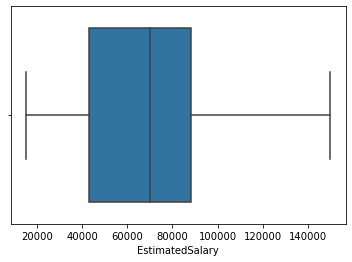

In [42]:
sns.boxplot(data["EstimatedSalary"])

Here we can see that the outliers are no more present in the data

### 2. Analyzing the outliers( Reason for outliers )

In [43]:
data = pd.read_csv("Social_Network_Ads_1.csv")

In [46]:
data[data["EstimatedSalary"] > 155500]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
161,15734234,8/22/2012,France,Male,36,5000000.0,1
281,15613334,2/15/2013,Italy,Female,54,233000.0,1


Here the data at 161 index we can see that the salary is very huge 5000000.0. Customer salary might not be this much huge thats is for sure. SO what we can do is , there are some chances of machine error,data entry error etc(Due to human or machine error).So the last 2 zeros may be by mistakes and causing outliers. So to remove those last two zeros we can divide that value by 100

In [48]:
outlier_data = data[data["EstimatedSalary"] > 155500]

In [49]:
for idx,row in outlier_data.iterrows():
    if row["EstimatedSalary"] > 155500:
        data.loc[idx,"EstimatedSalary"] /=100
        

In [50]:
data[data["EstimatedSalary"] > 155500]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased


### 2. Replace Lower outliers with lower boundary and Upper outliers with upper boundary

Only replace if the values are close to each other